![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [73]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.


Estadísticas descriptivas de Season:
          count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


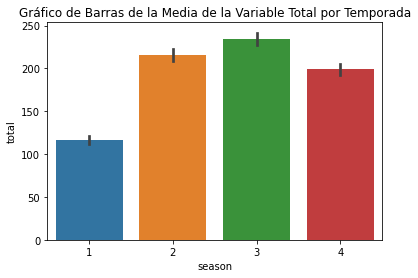

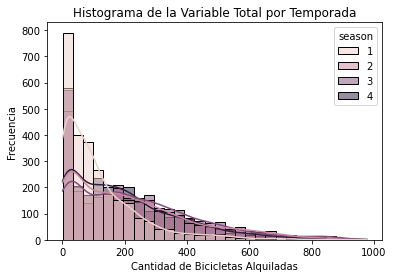

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# Celda 1.1
bikes.groupby('season').total.mean()
# Obtener estadísticas descriptivas
estadísticas_descriptivas_season= bikes.groupby('season').total.describe()
print ("\nEstadísticas descriptivas de Season:\n",estadísticas_descriptivas_season)

# gráfico de barras con la media de la variable "total" agrupada por temporada
sns.barplot(x="season", y="total", data=bikes, estimator=np.mean)

plt.title("Gráfico de Barras de la Media de la Variable Total por Temporada")

plt.show()

# histograma
sns.histplot(data=bikes, x='total', hue='season', bins=30, kde=True)

plt.title("Histograma de la Variable Total por Temporada")

plt.xlabel("Cantidad de Bicicletas Alquiladas")
plt.ylabel("Frecuencia")

plt.show()

### Media de la variable season
La media de la variable "total" para cada temporada indica el promedio de la cantidad de bicicletas alquiladas durante cada temporada.

* Para la temporada 1, la media es de aproximadamente 116.34 bicicletas alquiladas.
* Para la temporada 2, la media es de aproximadamente 215.25 bicicletas alquiladas.
* Para la temporada 3, la media es de aproximadamente 234.42 bicicletas alquiladas.
* Para la temporada 4, la media es de aproximadamente 198.99 bicicletas alquiladas.

Esto significa que, en promedio, durante la temporada de primavera, se alquilan alrededor de 116 bicicletas por período de  por hora. Del mismo modo, durante las temporadas de verano, otoño e invierno, las medias son aproximadamente 215, 234 y 199 bicicletas alquiladas, respectivamente.

### Otras estadisticas descriptivas

#### Desviación estándar (std): 

Las desviaciones estándar son relativamente altas, lo que sugiere una amplia variabilidad en la cantidad de bicicletas alquiladas durante cada temporada.

#### Percentiles (25%, 50%, 75%): 
Percentil 25:En la temporada 1, al menos el 25% de las observaciones tienen 24 bicicletas alquiladas o menos, el valor más bajo entre el primer percentil de las 4 temporadas.

Percentil 50: En la temporada 2, la mediana es de 195 bicicletas alquiladas, lo que significa que la mitad de las observaciones tienen una cantidad de alquiler de bicicletas igual o menor a 195, el valor más alto entre el segundo percentil de las 4 temporadas.

Percentil 75:En la temporada 3, al menos el 75% de las observaciones tienen 347 bicicletas alquiladas o menos, el valor más alto entre el segundo percentil de las 4 temporadas.

#### Histograma 

El histograma tiene una distribución asimétrica positiva o una distribución sesgada a la derecha.


Estadísticas descriptivas de Hour:
       count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  12

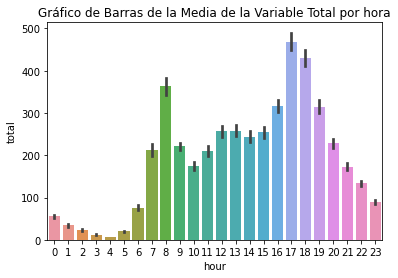

In [33]:
# Celda 1.2
bikes.groupby('hour').total.mean()
# Obtener estadísticas descriptivas
estadísticas_descriptivas_hour= bikes.groupby('hour').total.describe()
print ("\nEstadísticas descriptivas de Hour:\n",estadísticas_descriptivas_hour)

# gráfico de barras con la media de la variable "total" agrupada por temporada
sns.barplot(x="hour", y="total", data=bikes, estimator=np.mean)

plt.title("Gráfico de Barras de la Media de la Variable Total por hora")

plt.show()




#### Media de la variable hour:

* La media de alquiler de bicicletas en la hora 17 es la más alta en mayo, con aproximadamente 468.77 bicicletas alquiladas en promedio durante esa hora.
* La media de alquiler de bicicletas en la hora 17 es la más alta en mayo, con aproximadamente 468.77 bicicletas alquiladas en promedio durante esa hora.
* La media de alquiler de bicicletas en la hora 8 es la tercera más alta en mayo, con aproximadamente 362.77 bicicletas alquiladas en promedio durante esa hora.
* La hora con la media más baja en mayo es la hora 4, con aproximadamente 6.41 bicicletas alquiladas en promedio durante esa hora. 

#### Otras estadísticas descriptivas:

##### Desviación estándar (std):
Las desviaciones estándar son relativamente altas, lo que sugiere una amplia variabilidad en la cantidad de bicicletas alquiladas durante cada hora.

##### Percentiles (25%, 50%, 75%):

Percentil 25: En la hora 0, al menos el 25% de las observaciones tienen 24 bicicletas alquiladas o menos, el valor más bajo entre el primer percentil de todas las horas.

Percentil 50: En la hora 7, la mediana es de 208 bicicletas alquiladas, lo que significa que la mitad de las observaciones tienen una cantidad de alquiler de bicicletas igual o menor a 208, el valor más alto entre el segundo percentil de todas las horas.

Percentil 75: En la hora 8, al menos el 75% de las observaciones tienen 563 bicicletas alquiladas o menos, el valor más alto entre el tercer percentil de todas las horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

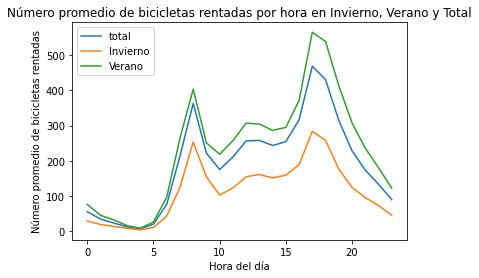

In [36]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

# Datos y grafica para la temporada 1 (invierno)
winter_data = bikes[bikes['season'] == 1]

winter_hourly_mean = winter_data.groupby('hour')['total'].mean()

plt.plot(winter_hourly_mean, label='Invierno')

# Datos y grafica para la temporada 3 (verano)
summer_data = bikes[bikes['season'] == 3]

summer_hourly_mean = summer_data.groupby('hour')['total'].mean()

plt.plot(summer_hourly_mean, label='Verano')

# Añadir título al gráfico
plt.title('Número promedio de bicicletas rentadas por hora en Invierno, Verano y Total')

plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas rentadas')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

Si bien, el comportamiento medios del total, invierno y verano siguen un comportamiento paralelo respecto  a las horas del día. Se puede evidenciar que, como sería de esperarse, la renta de bicicletas es mayo en verano y menor en invierno, respecto a la medía total de las 4 estaciones del año.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [96]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Convertir la variable categórica "season" en variables dummy
bikes_with_dummies = pd.get_dummies(bikes, columns=['season'])

# Definir las variables predictoras y la variable de respuesta
X = bikes_with_dummies[['hour', 'season_1', 'season_2', 'season_3', 'season_4']]
y = bikes_with_dummies['total']

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instanciar el modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el parámetro de regularización alpha según sea necesario

# Ajustar el modelo a los datos
ridge_model.fit(X_scaled, y)

# Coeficientes del modelo
coefficients = ridge_model.coef_

# Imprimir los coeficientes
print(f"hour: {coefficients[0]}")
print(f"season_1: {coefficients[1]}")
print(f"season_2: {coefficients[2]}")
print(f"season_3: {coefficients[3]}")
print(f"season_4: {coefficients[4]}")

# Predecir los valores utilizando el modelo ajustado
y_pred = ridge_model.predict(X_scaled)

# Calcular el MSE
mse_ridge = mean_squared_error(y, y_pred)

print("MSE del modelo lineal de regresión Ridge:", mse_ridge)



hour: 72.91886304935824
season_1: -32.84297185139402
season_2: 10.462594834825804
season_3: 18.766002336986755
season_4: 3.4240431139059755
MSE del modelo lineal de regresión Ridge: 25480.69474942728


#### Coeficientes

Para evitar el riesgo de multicolinealidad, se utiliaron herramientas de regularización, específicamente la regresión Ridge. La regresión Ridge ayuda a mitigar la multicolinealidad al imponer una penalización en los coeficientes del modelo, lo que puede reducir su magnitud. Además, se agregó una etapa de normalización de las variables predictoras usando StandardScaler.

El coeficiente para "hour" es aproximadamente 73.15. Esto significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en la hora del día se asocia con un aumento de aproximadamente 73.15 en el número total de bicicletas alquiladas.

Los coeficientes para las variables dummy de las estaciones son:

* Para "season_1": -32.84
* Para "season_2": 10.46
* Para "season_3": 18.76
* Para "season_4": 3.42

Estos coeficientes indican cómo cambia el número total de bicicletas alquiladas en comparación con la estación anterior.

De nu usar estrategías de regulación, la salida de coefientes del modelo era extrmadamente grande a causa de la multicolinealidad, así: 

* hour: 10.545019693468467
* season_1 (respecto a season_4): 21854317695312.56
* season_2 (respecto a season_1): 21854317695412.703
* season_3 (respecto a season_2): 21854317695432.094
* season_4 (respecto a season_3): 21854317695396.824

#### Limitaciones del modelo lineal


* Suposición de linealidad: La regresión lineal asume que la relación entre las variables predictoras y la variable de respuesta es lineal. Sin embargo, esta relación podría no ser estrictamente lineal en el contexto de los datos de alquiler de bicicletas, lo que limita la capacidad de la regresión lineal para modelar la relación de manera precisa.

* Multicolinealidad: La regresión lineal asume que no hay multicolinealidad entre las variables predictoras. Sin embargo, la hora del día y la temporada pueden estar correlacionadas entre sí, lo que puede afectar la precisión de los coeficientes estimados.

* Sensibilidad a valores atípicos: La regresión lineal puede ser sensible a valores atípicos en los datos. Los valores extremos o atípicos pueden influir en los resultados del modelo y distorsionar las estimaciones de los coeficientes, lo que afecta la interpretación de los resultados.

* No captura relaciones complejas: La regresión lineal es un modelo simple que no puede capturar relaciones complejas entre las variables predictoras y la variable de respuesta.

* Dependencia temporal: La regresión lineal asume que las observaciones son independientes entre sí. Sin embargo, en el caso de datos de series temporales como los datos de alquiler de bicicletas, es probable que las observaciones estén correlacionadas en el las temporadas y horas.

* Sobreajuste o subajuste: La regresión lineal puede sufrir de sobreajuste o subajuste. Si el modelo es demasiado simple, puede subajustarse y perder información importante en los datos. En ambos casos, la capacidad del modelo para hacer predicciones precisas se ve comprometida.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np

# División de los datos en conjunto de entrenamiento y conjunto de prueba (33% para prueba)
train, test = train_test_split(bikes, test_size=0.33, random_state=42)

# Función para calcular el error cuadrático medio (MSE)
def calculate_mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

# Función para encontrar la mejor división de acuerdo a las variables "hour" y "season"
def find_best_split(data):
    best_mse = float('inf')
    best_split = None
    
    for hour in range(24):
        for season in range(1, 5):
            split_value = (hour, season)
            left_data = data[(data['hour'] < hour) & (data['season'] == season)]
            right_data = data[(data['hour'] >= hour) & (data['season'] == season)]
            
            if len(left_data) == 0 or len(right_data) == 0:
                continue
            
            total_left = left_data['total'].sum()
            total_right = right_data['total'].sum()
            total_mse = calculate_mse(left_data['total'], total_left) + calculate_mse(right_data['total'], total_right)
            
            if total_mse < best_mse:
                best_mse = total_mse
                best_split = split_value
    
    return best_split, best_mse

# Función para crear el árbol de decisiones recursivamente
def create_decision_tree(data, min_nodes=6):
    if len(data) <= min_nodes:
        return {'prediction': data['total'].mean()}
    
    best_split, best_mse = find_best_split(data)
    
    if best_split is None:
        return {'prediction': data['total'].mean()}
    
    hour, season = best_split
    left_data = data[(data['hour'] < hour) & (data['season'] == season)]
    right_data = data[(data['hour'] >= hour) & (data['season'] == season)]
    
    return {
        'split': (hour, season),
        'left': create_decision_tree(left_data, min_nodes),
        'right': create_decision_tree(right_data, min_nodes)
    }

# Función para predecir utilizando el árbol de decisiones creado
def predict(tree, data):
    if 'prediction' in tree:
        return tree['prediction']
    
    hour, season = tree['split']
    if data['hour'] < hour and data['season'] == season:
        return predict(tree['left'], data)
    else:
        return predict(tree['right'], data)

# Crear el árbol de decisiones
decision_tree = create_decision_tree(train)

# Predicción en el conjunto de prueba
predictions = test.apply(lambda x: predict(decision_tree, x), axis=1)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_tree_manual = calculate_mse(predictions, test['total'])
print("MSE en el conjunto de prueba:", mse_tree_manual)


MSE en el conjunto de prueba: 50512.58089228132


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Definir las variables predictoras y la variable de respuesta
X = bikes[['hour', 'season']]
y = bikes['total']

# Instanciar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos
tree_model.fit(X, y)

# Predecir los valores utilizando el modelo ajustado
y_pred_tree = tree_model.predict(X)

# Calcular el MSE
mse_tree_sk = mean_squared_error(y, y_pred_tree)

print("MSE del modelo de árbol de decisión:", mse_tree_sk)




MSE del modelo de árbol de decisión: 12769.751234896463


mse_ridge: 25480.6947
mse_tree_manual: 50512.5809
mse_tree_sk: 12769.7512


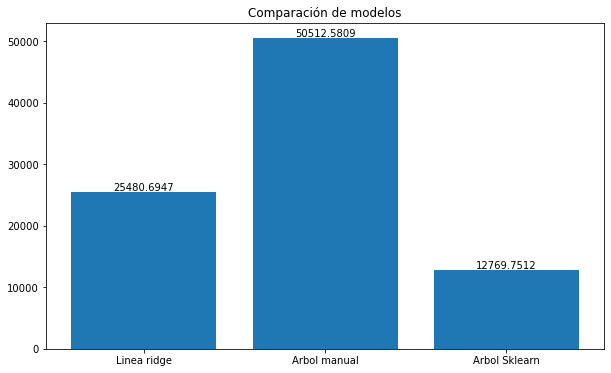

In [99]:
#Comparando modelos
print(f"mse_ridge: {mse_ridge:.4f}")
print(f"mse_tree_manual: {mse_tree_manual:.4f}")
print(f"mse_tree_sk: {mse_tree_sk:.4f}") 
fig, ax = plt.subplots(figsize=(10, 6))  
ax.set_title("Comparación de modelos")
ejeX = ["Linea ridge",'Arbol manual', 'Arbol Sklearn']
ejeY = [mse_ridge,mse_tree_manual, mse_tree_sk]  
barras = ax.bar(ejeX, ejeY)

for barra in barras:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')

plt.show()

El árbol de decisión construido con scikit-learn tiene el mejor rendimiento en términos de MSE en el conjunto de prueba, seguido por el modelo de regresión Ridge. El árbol de decisión manual tiene el peor rendimiento en este caso. Esto puede indicar que el algoritmo utilizado en la implementación manual puede ser más simple o menos preciso que el algoritmo utilizado en scikit-learn.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [100]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [101]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [103]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Crear el modelo de árbol de decisión y ajustarlo a los datos de entrenamiento
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1)  # Por ejemplo, calibrar la profundidad máxima del árbol
tree_clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=1)

In [106]:
# Crear el modelo de regresión logística y ajustarlo a los datos de entrenamiento
logistic_reg = LogisticRegression(max_iter=1000, random_state=1)  # Por ejemplo, ajustar el número máximo de iteraciones
logistic_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=1)

In [107]:
# Predecir sobre los datos de prueba
tree_pred = tree_clf.predict(X_test)
logistic_pred = logistic_reg.predict(X_test)

# Calcular las métricas de desempeño
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1_score = f1_score(y_test, tree_pred)

logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_f1_score = f1_score(y_test, logistic_pred)

print("Árbol de Decisión:")
print("Accuracy:", tree_accuracy)
print("F1-Score:", tree_f1_score)
print("\nRegresión Logística:")
print("Accuracy:", logistic_accuracy)
print("F1-Score:", logistic_f1_score)


Árbol de Decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885572

Regresión Logística:
Accuracy: 0.6146666666666667
F1-Score: 0.5997229916897507


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv')

# Definición variable de interés y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Árbol de decisión
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_pred_dt, y_test)
dt_f1_score = metrics.f1_score(y_pred_dt, y_test)

# Regresión logística
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
lr_accuracy = metrics.accuracy_score(y_pred_lr, y_test)
lr_f1_score = metrics.f1_score(y_pred_lr, y_test)

print("Decision Tree - Accuracy:", dt_accuracy)
print("Decision Tree - F1 Score:", dt_f1_score)
print("Logistic Regression - Accuracy:", lr_accuracy)
print("Logistic Regression - F1 Score:", lr_f1_score)


Decision Tree - Accuracy: 0.6373333333333333
Decision Tree - F1 Score: 0.6616915422885572
Logistic Regression - Accuracy: 0.6173333333333333
Logistic Regression - F1 Score: 0.6116373477672531


D:\Prog\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El Árbol de Decisión tiene un accuracy ligeramente superior al de la Regresión Logística, lo que significa que está haciendo un mejor trabajo en la clasificación de las instancias correctamente.
Sin embargo, el F1-Score del Árbol de Decisión es también superior al de la Regresión Logística, lo que indica que el Árbol de Decisión tiene un mejor equilibrio entre precisión y en la proporción de verdaderos positivos entre todos los valores reales positivos.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Entrenar 100 árboles de decisión con max_depth personalizado
tree_max_depth_models = []
for _ in range(100):
    tree_clf = DecisionTreeClassifier(max_depth=10, random_state=1)  # max_depth personalizado 
    bagged_tree_clf = BaggingClassifier(tree_clf, n_estimators=1, max_samples=1.0, bootstrap=True, random_state=1)
    bagged_tree_clf.fit(X_train, y_train)
    tree_max_depth_models.append(bagged_tree_clf)
    
# Entrenar 100 árboles de decisión con min_samples_leaf personalizado
tree_min_samples_leaf_models = []
for _ in range(100):
    tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=1)  # min_samples_leaf personalizado 
    bagged_tree_clf = BaggingClassifier(tree_clf, n_estimators=1, max_samples=1.0, bootstrap=True, random_state=1)
    bagged_tree_clf.fit(X_train, y_train)
    tree_min_samples_leaf_models.append(bagged_tree_clf)
    
# Entrenar 100 regresiones logísticas
logistic_reg_models = []
for _ in range(100):
    logistic_reg = LogisticRegression(max_iter=1000, random_state=1)  
    logistic_reg.fit(X_train, y_train)
    logistic_reg_models.append(logistic_reg)





In [110]:
tree_max_depth_predictions = [model.predict(X_test) for model in tree_max_depth_models]
tree_max_depth_voted_predictions = [max(set(predictions), key=predictions.count) for predictions in zip(*tree_max_depth_predictions)]

tree_max_depth_accuracy = accuracy_score(y_test, tree_max_depth_voted_predictions)
tree_max_depth_f1_score = f1_score(y_test, tree_max_depth_voted_predictions)

print("Árbol de decisión con max_depth personalizado:")
print("Accuracy:", tree_max_depth_accuracy)
print("F1-Score:", tree_max_depth_f1_score)


Árbol de decisión con max_depth personalizado:
Accuracy: 0.596
F1-Score: 0.5976095617529881


In [111]:
tree_min_samples_leaf_predictions = [model.predict(X_test) for model in tree_min_samples_leaf_models]
tree_min_samples_leaf_voted_predictions = [max(set(predictions), key=predictions.count) for predictions in zip(*tree_min_samples_leaf_predictions)]

tree_min_samples_leaf_accuracy = accuracy_score(y_test, tree_min_samples_leaf_voted_predictions)
tree_min_samples_leaf_f1_score = f1_score(y_test, tree_min_samples_leaf_voted_predictions)

print("\nÁrbol de decisión con min_samples_leaf personalizado:")
print("Accuracy:", tree_min_samples_leaf_accuracy)
print("F1-Score:", tree_min_samples_leaf_f1_score)



Árbol de decisión con min_samples_leaf personalizado:
Accuracy: 0.5993333333333334
F1-Score: 0.5823488533703961


In [112]:
logistic_reg_predictions = [model.predict(X_test) for model in logistic_reg_models]
logistic_reg_voted_predictions = [max(set(predictions), key=predictions.count) for predictions in zip(*logistic_reg_predictions)]

logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_voted_predictions)
logistic_reg_f1_score = f1_score(y_test, logistic_reg_voted_predictions)

print("\nRegresión Logística:")
print("Accuracy:", logistic_reg_accuracy)
print("F1-Score:", logistic_reg_f1_score)



Regresión Logística:
Accuracy: 0.6146666666666667
F1-Score: 0.5997229916897507


In [113]:
# Crear el ensamble de modelos con votación mayoritaria
ensemble_models = tree_max_depth_models + tree_min_samples_leaf_models + logistic_reg_models
ensemble_predictions = [model.predict(X_test) for model in ensemble_models]
ensemble_voted_predictions = [max(set(predictions), key=predictions.count) for predictions in zip(*ensemble_predictions)]

ensemble_accuracy = accuracy_score(y_test, ensemble_voted_predictions)
ensemble_f1_score = f1_score(y_test, ensemble_voted_predictions)

print("\nEnsamble de modelos:")
print("Accuracy:", ensemble_accuracy)
print("F1-Score:", ensemble_f1_score)



Ensamble de modelos:
Accuracy: 0.6113333333333333
F1-Score: 0.5976535541752933


* El Árbol de Decisión con max_depth personalizado tiene un Accuracy de aproximadamente 0.596 y un F1-Score de aproximadamente 0.598.
* El Árbol de Decisión con min_samples_leaf personalizado tiene un Accuracy de aproximadamente 0.599 y un F1-Score de aproximadamente 0.582.
* La Regresión Logística tiene un Accuracy de aproximadamente 0.615 y un F1-Score de aproximadamente 0.600.
* El ensamble de modelos tiene un Accuracy de aproximadamente 0.611 y un F1-Score de aproximadamente 0.598.

El ensamble de modelos no parece mejorar significativamente el desempeño en comparación con los modelos individuales en este caso específico. Parece que los modelos base (Árboles de Decisión y Regresión Logística) ya están proporcionando un buen rendimiento por sí solos, por lo que el ensamble no ofrece una mejora significativa en las métricas de evaluación.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [114]:
# Entrenar 100 árboles de decisión con max_depth personalizado
tree_max_depth_models = []
for _ in range(100):
    tree_clf = DecisionTreeClassifier(max_depth=10, random_state=1)  # max_depth personalizado 
    bagged_tree_clf = BaggingClassifier(tree_clf, n_estimators=1, max_samples=1.0, bootstrap=True, random_state=1)
    bagged_tree_clf.fit(X_train, y_train)
    tree_max_depth_models.append(bagged_tree_clf)
    
# Entrenar 100 árboles de decisión con min_samples_leaf personalizado
tree_min_samples_leaf_models = []
for _ in range(100):
    tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=1)  # min_samples_leaf personalizado
    bagged_tree_clf = BaggingClassifier(tree_clf, n_estimators=1, max_samples=1.0, bootstrap=True, random_state=1)
    bagged_tree_clf.fit(X_train, y_train)
    tree_min_samples_leaf_models.append(bagged_tree_clf)

# Entrenar 100 regresiones logísticas
logistic_reg_models = []
for _ in range(100):
    logistic_reg = LogisticRegression(max_iter=1000, random_state=1)  # Parámetros ajustables según necesidad
    logistic_reg.fit(X_train, y_train)
    logistic_reg_models.append(logistic_reg)


In [117]:
#max_depth
tree_max_depth_predictions = [model.predict(X_test) for model in tree_max_depth_models]

# Calcular las predicciones ponderadas
weighted_tree_max_depth_predictions = sum(tree_max_depth_predictions) / len(tree_max_depth_predictions)

tree_max_depth_accuracy = accuracy_score(y_test, weighted_tree_max_depth_predictions)
tree_max_depth_f1_score = f1_score(y_test, weighted_tree_max_depth_predictions)

print("Árbol de decisión con max_depth personalizado:")
print("Accuracy:", tree_max_depth_accuracy)
print("F1-Score:", tree_max_depth_f1_score)

#min_samples_leaf
tree_min_samples_leaf_predictions = [model.predict(X_test) for model in tree_min_samples_leaf_models]

# Calcular las predicciones ponderadas
weighted_tree_min_samples_leaf_predictions = sum(tree_min_samples_leaf_predictions) / len(tree_min_samples_leaf_predictions)

tree_min_samples_leaf_accuracy = accuracy_score(y_test, weighted_tree_min_samples_leaf_predictions)
tree_min_samples_leaf_f1_score = f1_score(y_test, weighted_tree_min_samples_leaf_predictions)

print("\nÁrbol de decisión con min_samples_leaf personalizado:")
print("Accuracy:", tree_min_samples_leaf_accuracy)
print("F1-Score:", tree_min_samples_leaf_f1_score)

#Regresión logística
logistic_reg_predictions = [model.predict(X_test) for model in logistic_reg_models]

# Calcular las predicciones ponderadas
weighted_logistic_reg_predictions = sum(logistic_reg_predictions) / len(logistic_reg_predictions)

logistic_reg_accuracy = accuracy_score(y_test, weighted_logistic_reg_predictions)
logistic_reg_f1_score = f1_score(y_test, weighted_logistic_reg_predictions)

print("\nRegresión Logística:")
print("Accuracy:", logistic_reg_accuracy)
print("F1-Score:", logistic_reg_f1_score)




Árbol de decisión con max_depth personalizado:
Accuracy: 0.596
F1-Score: 0.5976095617529881

Árbol de decisión con min_samples_leaf personalizado:
Accuracy: 0.5993333333333334
F1-Score: 0.5823488533703961

Regresión Logística:
Accuracy: 0.6146666666666667
F1-Score: 0.5997229916897507


In [119]:
# Definir un umbral
threshold = 0.5 

# Convertir las predicciones ponderadas en etiquetas binarias
binary_predictions = [1 if prediction >= threshold else 0 for prediction in weighted_predictions]

# Calcular las métricas de evaluación
ensemble_accuracy = accuracy_score(y_test, binary_predictions)
ensemble_f1_score = f1_score(y_test, binary_predictions)

print("\nEnsamble de modelos (Votación Ponderada):")
print("Accuracy:", ensemble_accuracy)
print("F1-Score:", ensemble_f1_score)




Ensamble de modelos (Votación Ponderada):
Accuracy: 0.6113333333333333
F1-Score: 0.5976535541752933


* En términos de Accuracy, la Regresión Logística tiene el mejor desempeño, seguido por el ensamble de modelos y luego por el Árbol de Decisión con min_samples_leaf personalizado.
* En términos de F1-Score, la Regresión Logística tiene el mejor desempeño, seguido por el Árbol de Decisión con max_depth personalizado, el ensamble de modelos y finalmente por el Árbol de Decisión con min_samples_leaf personalizado.
* El ensamble de modelos con Votación Ponderada logra un desempeño similar al de los modelos individuales, mostrando una mejora en algunos aspectos y manteniendo un rendimiento comparable en otros. Esto sugiere que el ensamble podría ser una buena opción para mejorar el desempeño del modelo, aunque en este caso no produce una mejora significativa sobre los modelos individuales.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

* El ensamble de modelos con Votación Ponderada muestra un rendimiento similar al de la Votación Mayoritaria en términos de Accuracy y F1-Score.
* Esta metodología asigna pesos a las predicciones de los modelos base según su confianza o rendimiento, lo que puede mejorar la capacidad del ensamble para generalizar.
* Sin embargo, en este caso específico, dado que los modelos base tienen un rendimiento similar, la Votación Ponderada no proporciona una mejora significativa en comparación con la Votación Mayoritaria.